In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import h5py

In [2]:
with h5py.File("usps.h5", 'r') as hf:
        train = hf.get('train')
        train_x = train.get('data')[:]
        train_y = train.get('target')[:]
        test = hf.get('test')
        test_x = test.get('data')[:]
        test_y = test.get('target')[:]

In [3]:
A_dict = dict()

for label in range(10):
    A_dict["A_"+str(label)] = train_x[train_y==label].T



In [4]:
U_matrices = dict()
S_matrices = dict()
V_matrices = dict()

for label in range(10):
    U, S, V = np.linalg.svd(A_dict["A_"+str(label)])

    U_matrices["U_"+str(label)] = U 
    S_matrices["S_"+str(label)] = S
    V_matrices["V_"+str(label)] = V

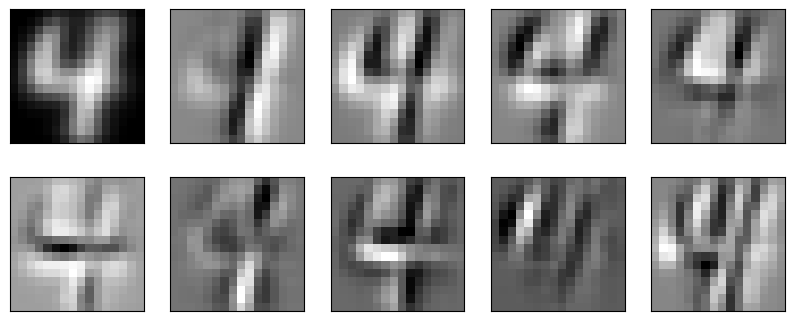

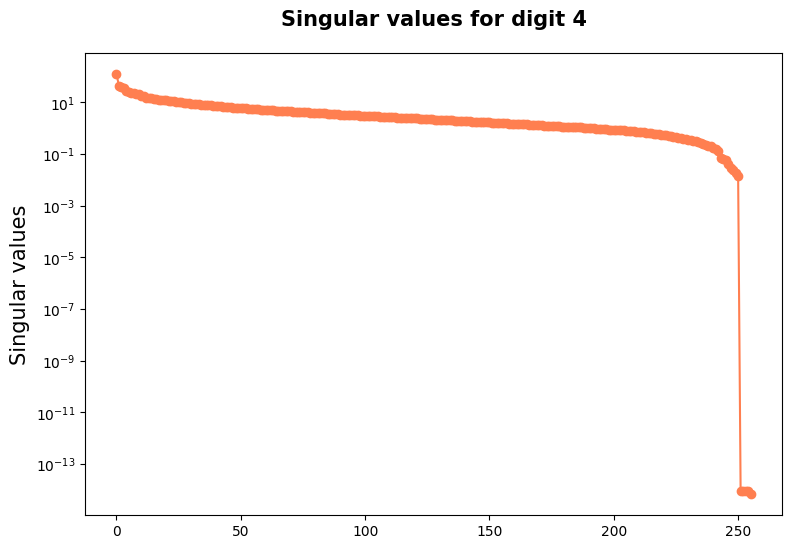

In [5]:
desired_number = 4

plt.figure(figsize=(10,4))
for eigen_number in range(10):
    plt.subplot(2, 5, eigen_number + 1)
    plt.imshow(U_matrices["U_"+str(desired_number)][:, eigen_number].reshape(16,16),cmap='binary')
    plt.xticks(())
    plt.yticks(())


plt.figure(figsize = (9, 6))
plt.plot(S_matrices["S_"+str(desired_number)], color="coral", marker="o")
plt.title(f"Singular values for digit {desired_number}",fontsize=15, weight="bold", pad=20)
plt.ylabel("Singular values" ,fontsize=15)
plt.yscale("log")
plt.show()

In [6]:
predictions = list()
I = np.eye(test_x.T.shape[0])
accuracy_results = list()

for number_of_components in range(5, 21):
    print(f"Calculating accuracy with {number_of_components} components ")
    predictions = list()
    for sample in range(test_x.shape[0]):
        residuals = list()
        for label in range(10):
            u = U_matrices["U_"+str(label)][:,0:number_of_components]
            res = np.linalg.norm(np.dot(I-np.dot(u,u.T), test_x[sample].T))
            residuals.append(res)
    
        predictions.append(np.argmin(residuals))

    predictions = np.array(predictions)
    accuracy_results.append(accuracy_score(predictions, test_y))
    

Calculating accuracy with 5 components 
Calculating accuracy with 6 components 
Calculating accuracy with 7 components 
Calculating accuracy with 8 components 
Calculating accuracy with 9 components 
Calculating accuracy with 10 components 
Calculating accuracy with 11 components 
Calculating accuracy with 12 components 
Calculating accuracy with 13 components 
Calculating accuracy with 14 components 
Calculating accuracy with 15 components 
Calculating accuracy with 16 components 
Calculating accuracy with 17 components 
Calculating accuracy with 18 components 
Calculating accuracy with 19 components 
Calculating accuracy with 20 components 


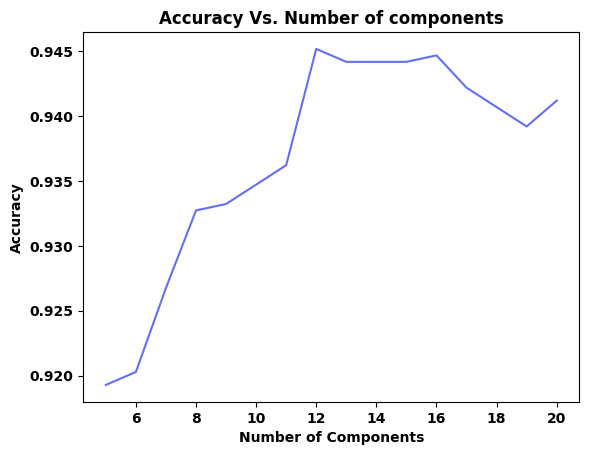

In [7]:
plt.plot(np.arange(5, 21), accuracy_results, c="#636EFA")
plt.title("Accuracy Vs. Number of components", weight='bold')
plt.xlabel("Number of Components", weight='bold')
plt.ylabel("Accuracy", weight='bold')
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()

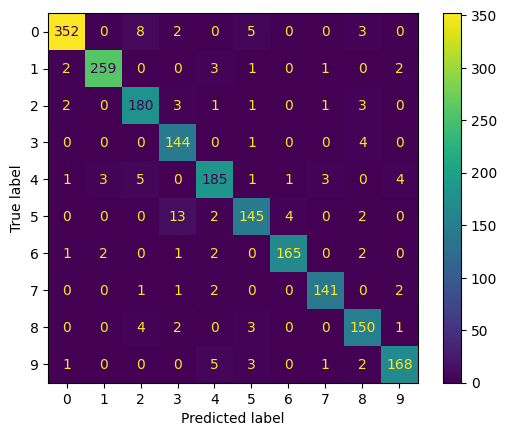

In [8]:
cm = confusion_matrix(predictions, test_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(0, 10))
disp.plot()
plt.show()